In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dir=r"C:\Users\yashw\Downloads\archive (3)\Data\Train_Data"

In [3]:
img_data = tf.keras.utils.image_dataset_from_directory(dir)

Found 4611 files belonging to 2 classes.


In [4]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.3)
train=datagen.flow_from_directory(dir,batch_size=32,target_size=(224,224),class_mode="categorical",subset="training")
valid=datagen.flow_from_directory(dir,batch_size=32,target_size=(224,224),class_mode="categorical",subset="validation")

Found 3228 images belonging to 2 classes.
Found 1383 images belonging to 2 classes.


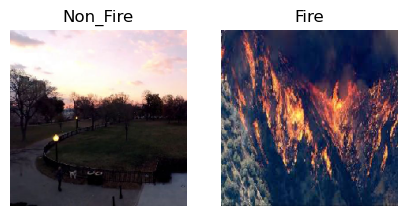

In [5]:
import matplotlib.pyplot as plt

class_names = ['Non_Fire', 'Fire']
class_images = []
images, labels = next(train)

for i, class_name in enumerate(class_names):
    class_index = train.class_indices[class_name]
   
    for j in range(len(labels)):
        if np.argmax(labels[j]) == class_index:
            class_images.append(images[j])
            break
plt.figure(figsize=(5, 10))

for i, img in enumerate(class_images):
    plt.subplot(1, len(class_images), i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(class_names[i])

plt.show()


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation="softmax")])

model_1.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])


C:\Users\yashw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history_1=model_1.fit(train,epochs=10,steps_per_epoch=len(train),validation_data=valid,validation_steps=len(valid))

C:\Users\yashw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 73s 625ms/step - accuracy: 0.6719 - loss: 0.5865 - val_accuracy: 0.8807 - val_loss: 0.3221
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 97s 964ms/step - accuracy: 0.9067 - loss: 0.2424 - val_accuracy: 0.9241 - val_loss: 0.2148
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 88s 867ms/step - accuracy: 0.9333 - loss: 0.1829 - val_accuracy: 0.9320 - val_loss: 0.1894
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 72s 717ms/step - accuracy: 0.9374 - loss: 0.1635 - val_accuracy: 0.9161 - val_loss: 0.2333
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 98s 973ms/step - accuracy: 0.9565 - loss: 0.1243 - val_accuracy: 0.9262 - val_loss: 0.2312
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 72s 717ms/step - accuracy: 0.9752 - loss: 0.0848 - val_accuracy: 0.9328 - val_loss: 0.2156
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 91s 907ms/step - accuracy: 0.9816 - loss: 0.0566 - val_accuracy: 0.9270 - val_loss: 0.2645
Epoch 8/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 98s 969ms/step - accuracy: 0.9935 - loss: 0

<Axes: >

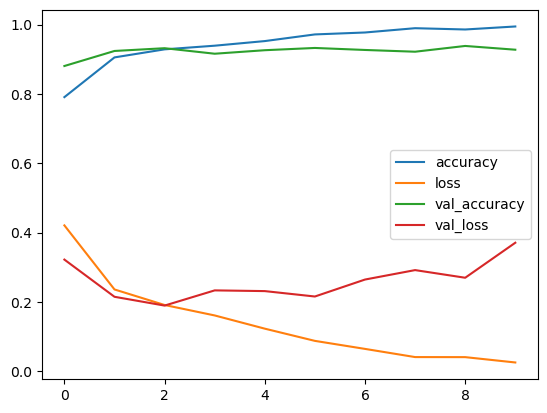

In [8]:
pd.DataFrame(history_1.history).plot()

In [9]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax")])


C:\Users\yashw\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
def plot_loss_curves(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    accuracy=history.history['accuracy']
    val_accuracy=history.history['val_accuracy']

    epochs=range(len(history.history['loss']))
                 
    plt.plot(epochs,loss,label="Training loss")
    plt.plot(epochs,val_loss,label='val_loss')
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs,accuracy,label="Training accuracy")
    plt.plot(epochs,val_accuracy,label='val_accuracy')
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend();
    



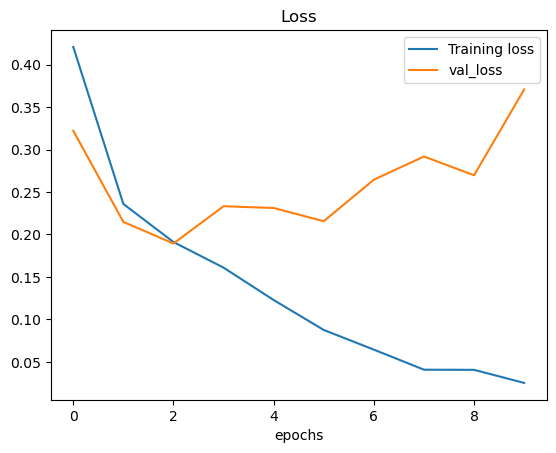

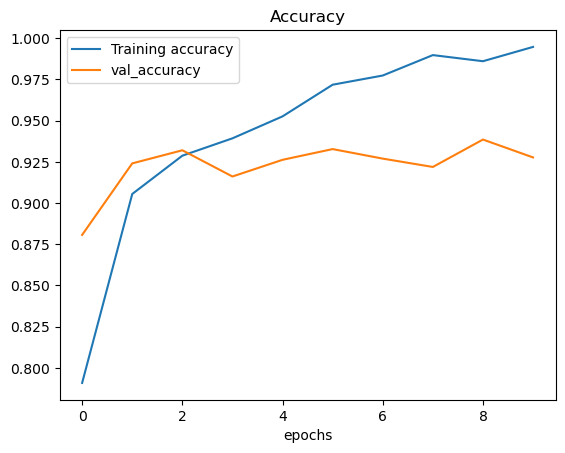

In [11]:
plot_loss_curves(history_1)

In [12]:
model_2=tf.keras.models.clone_model(model_1)

In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_2=model_2.fit(train, epochs=10, validation_data=valid, callbacks=[lr_scheduler])


Epoch 1/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 87s 772ms/step - accuracy: 0.8100 - loss: 0.4514 - val_accuracy: 0.8460 - val_loss: 0.3313 - learning_rate: 0.0010
Epoch 2/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 84s 832ms/step - accuracy: 0.8970 - loss: 0.2566 - val_accuracy: 0.8944 - val_loss: 0.2656 - learning_rate: 0.0010
Epoch 3/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 103s 1s/step - accuracy: 0.9259 - loss: 0.1982 - val_accuracy: 0.8930 - val_loss: 0.2757 - learning_rate: 0.0010
Epoch 4/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 62s 608ms/step - accuracy: 0.9419 - loss: 0.1676 - val_accuracy: 0.9248 - val_loss: 0.2036 - learning_rate: 0.0010
Epoch 5/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 100s 993ms/step - accuracy: 0.9565 - loss: 0.1125 - val_accuracy: 0.9349 - val_loss: 0.2241 - learning_rate: 0.0010
Epoch 6/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 89s 878ms/step - accuracy: 0.9540 - loss: 0.1349 - val_accuracy: 0.9356 - val_loss: 0.2006 - learning_rate: 0.0010
Epoch 7/10
101/101 ━━━━━━━━━━━━━━━━━━━━ 70s 702ms/step - accuracy: 0.97

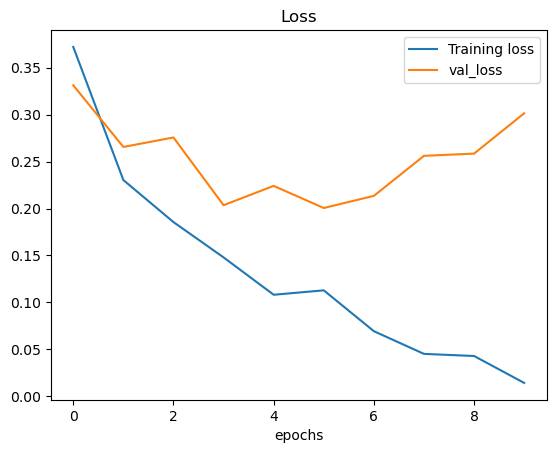

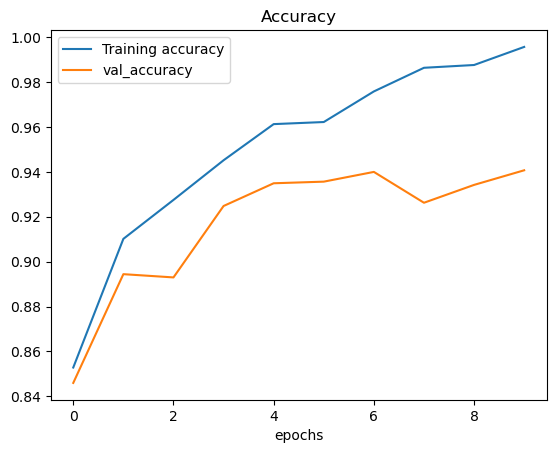

In [14]:
plot_loss_curves(history_2)

In [15]:
test=r"C:\Users\yashw\Downloads\archive (3)\Data\Test"

In [16]:
image_files=[os.path.join(test,filename) for filename in os.listdir(test)]

In [17]:
image_files

['C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_0.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_1.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_10.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_11.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_12.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_13.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_14.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_15.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_16.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_17.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_18.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_19.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_2.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_20.jpg',
 'C:\\Users\\yashw\\Downloads\\archive (3)\\Data\\Test\\F_21.jpg'

In [18]:
def load_and_prep_image(filename,img_shape=224):
    img=tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)
    img=tf.image.resize(img,size=[img_shape,img_shape])
    img=img/255.
    return img

In [19]:
class_names=train.class_indices

In [20]:
class_names=list(train.class_indices.keys())

In [21]:
class_names

['Fire', 'Non_Fire']

In [22]:
def pred_and_plot(model,filename,class_name):
    img=load_and_prep_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class_index = tf.argmax(pred[0]).numpy()
    pred_class=class_names[pred_class_index]
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


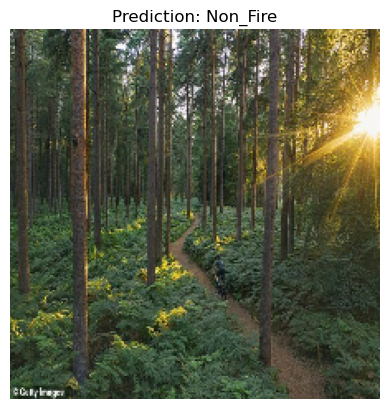

In [82]:
import random
pred_and_plot(model,random.choice(image_files),class_name)

In [78]:
model.save('fire_prediction_model.h5')



In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),  
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(2, activation='softmax'))]  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\yashw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
history = model.fit(train,validation_data=valid,epochs=25,  batch_size=32,callbacks=[tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', 
         patience=3, factor=0.5, min_lr=1e-6)])


Epoch 1/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8626 - loss: 6.9339 - val_accuracy: 0.9046 - val_loss: 0.2980 - learning_rate: 0.0010
Epoch 2/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8866 - loss: 3.0228 - val_accuracy: 0.7599 - val_loss: 1.1468 - learning_rate: 0.0010
Epoch 3/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.8729 - loss: 1.8000 - val_accuracy: 0.6341 - val_loss: 0.8989 - learning_rate: 0.0010
Epoch 4/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8839 - loss: 0.9828 - val_accuracy: 0.8438 - val_loss: 0.3645 - learning_rate: 0.0010
Epoch 5/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.8894 - loss: 0.6633 - val_accuracy: 0.9009 - val_loss: 0.2502 - learning_rate: 5.0000e-04
Epoch 6/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.8875 - loss: 0.6123 - val_accuracy: 0.8952 - val_loss: 0.2516 - learning_rate: 5.0000e-04
Epoch 7/25
101/101 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.8860 - 

KeyboardInterrupt: 

In [58]:
test_loss, test_acc = model.evaluate(valid)
print(f"Test Accuracy: {test_acc:.2f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 286ms/step - accuracy: 0.9353 - loss: 0.1770
Test Accuracy: 0.94


In [ ]:

y_pred = model.predict(valid)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = valid.classes
print(classification_report(y_true, y_pred_classes, target_names=class_names))
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
